
# Assessed Task 3: Specification
## Basic text classification

*  Student name: Umut Demirhan
*  Student ID: 46739106
*  Unit code and name: COMP8220 Machine Learning



In this assessed task,  text classification with 7 sub-tasks is demonstrated

## Task 0 


In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


In [2]:
print(tf.__version__)

2.9.2


## Sentiment analysis




### Download and explore the IMDB dataset


In [3]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
# drive_dir = "/content/drive/MyDrive/FL/text_classify"
dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 3s 0us/step


In [4]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'urls_pos.txt',
 'urls_neg.txt',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_unsup.txt',
 'unsup']

In [5]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


### Load the dataset

In [6]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [7]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [8]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [9]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [10]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


### Prepare the dataset for training


In [11]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [12]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [13]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [14]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [15]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [16]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [17]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

### Configure the dataset for performance

In [18]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

It's time to create your neural network:

In [20]:
embedding_dim = 16

In [21]:
OrigNN = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

OrigNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

### Loss function and optimizer

Now, configure the model to use an optimizer and a loss function:

In [22]:
OrigNN.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### Train the model


In [23]:
epochs = 10
history = OrigNN.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 8s 6ms/step - loss: 0.6647 - binary_accuracy: 0.6941 - val_loss: 0.6163 - val_binary_accuracy: 0.7714
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5498 - binary_accuracy: 0.8001 - val_loss: 0.4992 - val_binary_accuracy: 0.8218
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4457 - binary_accuracy: 0.8446 - val_loss: 0.4208 - val_binary_accuracy: 0.8470
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3788 - binary_accuracy: 0.8664 - val_loss: 0.3741 - val_binary_accuracy: 0.8608
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3355 - binary_accuracy: 0.8795 - val_loss: 0.3451 - val_binary_accuracy: 0.8678
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3054 - binary_accuracy: 0.8870 - val_loss: 0.3259 - val_binary_accuracy: 0.8722
Epoch 7/10
625/625 [==============================] - 2s 3ms/ste

### Evaluate the model

Let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [24]:
loss, accuracy = OrigNN.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3102 - binary_accuracy: 0.8737
Loss:  0.31015631556510925
Accuracy:  0.8736799955368042


### Create a plot of accuracy and loss over time


In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

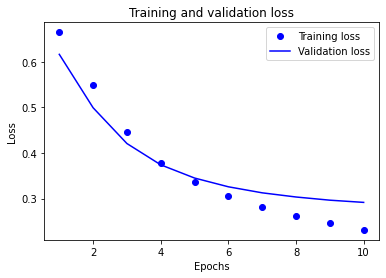

In [26]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

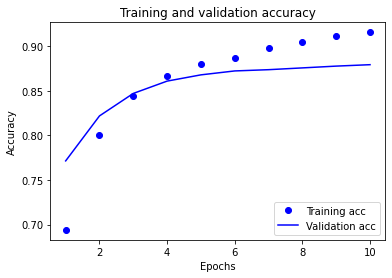

In [27]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Export the model

In [28]:
export_OrigNN = tf.keras.Sequential([
  vectorize_layer,
  OrigNN,
  layers.Activation('sigmoid')
])

export_OrigNN.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_OrigNN.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3102 - accuracy: 0.8737
0.8736799955368042


### Inference on new data

To get predictions for new examples, you can simply call `model.predict()`.

In [29]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_OrigNN.predict(examples)

1/1 [==============================] - 0s 251ms/step


array([[0.61546916],
       [0.437941  ],
       [0.3545477 ]], dtype=float32)

# Task 1 

Add a Dense hidden layer to the neural net in an appropriate place with (100 + 20 * N) neurons.  Call this network DenseNNi. Compare the performance of DenseNNi with OrigNN, considering the performance at each epoch, not just the final one.

In [30]:
DenseNNi = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(220),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

DenseNNi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160016    
                                                                 
 dense_1 (Dense)             (None, None, 220)         3740      
                                                                 
 dropout_2 (Dropout)         (None, None, 220)         0         
                                                                 
 global_average_pooling1d_1   (None, 220)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 220)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 221       
                                                      

In [31]:
DenseNNi.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [32]:
epochs = 10
history_DenseNNi = DenseNNi.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4558 - binary_accuracy: 0.7702 - val_loss: 0.3094 - val_binary_accuracy: 0.8740
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2434 - binary_accuracy: 0.9035 - val_loss: 0.3028 - val_binary_accuracy: 0.8778
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1847 - binary_accuracy: 0.9305 - val_loss: 0.3358 - val_binary_accuracy: 0.8692
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1453 - binary_accuracy: 0.9473 - val_loss: 0.3784 - val_binary_accuracy: 0.8680
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1139 - binary_accuracy: 0.9611 - val_loss: 0.4379 - val_binary_accuracy: 0.8678
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0887 - binary_accuracy: 0.9722 - val_loss: 0.5192 - val_binary_accuracy: 0.8644
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [33]:
loss, accuracy = DenseNNi.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.8277 - binary_accuracy: 0.8350
Loss:  0.8277385830879211
Accuracy:  0.8349599838256836


* At the first epoch DenseNNi model has 0.87 accuracy while Ori model only has 0.77 but increase to the last epoch DenseNNi model accuracy is only 0.85, Ori model accuracy is 0.88<br>
* We can see Ori model better than DenseNNi

# Task 2

In DenseNNi you should have two dropout layers, both with dropout hyperparameter 0.2.  In this task you're going to investigate the effect of changing the dropout hyperparameter.  Let D = 0.3 + 0.05 * N.  Investigate three new networks based on the new combinations of dropout hyperparameter, i.e.

#### 1. first dropout layer has hyperparameter 0.2 and the second has hyperparameter D (call this model DenseNNii);

In [34]:
DenseNNii = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(220),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.6),
  layers.Dense(1)])

DenseNNii.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160016    
                                                                 
 dense_3 (Dense)             (None, None, 220)         3740      
                                                                 
 dropout_4 (Dropout)         (None, None, 220)         0         
                                                                 
 global_average_pooling1d_2   (None, 220)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 220)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 221       
                                                      

#### 2. first dropout layer has hyperparameter D and the second has hyperparameter 0.2 (call this model DenseNNiii);

In [35]:
DenseNNiii = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(220),
  layers.Dropout(0.6),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

DenseNNiii.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 dense_5 (Dense)             (None, None, 220)         3740      
                                                                 
 dropout_6 (Dropout)         (None, None, 220)         0         
                                                                 
 global_average_pooling1d_3   (None, 220)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 220)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 221       
                                                      

#### 3. both dropout layers have hyperparameter D (call this model DenseNNiv).

In [36]:
DenseNNiv = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(220),
  layers.Dropout(0.6),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.6),
  layers.Dense(1)])

DenseNNiv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160016    
                                                                 
 dense_7 (Dense)             (None, None, 220)         3740      
                                                                 
 dropout_8 (Dropout)         (None, None, 220)         0         
                                                                 
 global_average_pooling1d_4   (None, 220)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_9 (Dropout)         (None, 220)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 221       
                                                      

In [37]:
DenseNNii.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [38]:
DenseNNiii.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [39]:
DenseNNiv.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [40]:
epochs = 10
history_DenseNNii = DenseNNii.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4812 - binary_accuracy: 0.7560 - val_loss: 0.3137 - val_binary_accuracy: 0.8726
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2537 - binary_accuracy: 0.9005 - val_loss: 0.2969 - val_binary_accuracy: 0.8780
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1936 - binary_accuracy: 0.9260 - val_loss: 0.3150 - val_binary_accuracy: 0.8734
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1536 - binary_accuracy: 0.9441 - val_loss: 0.3528 - val_binary_accuracy: 0.8706
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1212 - binary_accuracy: 0.9585 - val_loss: 0.4103 - val_binary_accuracy: 0.8688
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0966 - binary_accuracy: 0.9695 - val_loss: 0.4775 - val_binary_accuracy: 0.8632
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [41]:
epochs = 10
history_DenseNNiii = DenseNNiii.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4585 - binary_accuracy: 0.7684 - val_loss: 0.3120 - val_binary_accuracy: 0.8712
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2450 - binary_accuracy: 0.9027 - val_loss: 0.3045 - val_binary_accuracy: 0.8754
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1861 - binary_accuracy: 0.9293 - val_loss: 0.3335 - val_binary_accuracy: 0.8680
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1467 - binary_accuracy: 0.9467 - val_loss: 0.3710 - val_binary_accuracy: 0.8686
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1169 - binary_accuracy: 0.9602 - val_loss: 0.4294 - val_binary_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0942 - binary_accuracy: 0.9693 - val_loss: 0.4982 - val_binary_accuracy: 0.8644
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [42]:
epochs = 10
history_DenseNNiv = DenseNNiv.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4881 - binary_accuracy: 0.7516 - val_loss: 0.3152 - val_binary_accuracy: 0.8746
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2575 - binary_accuracy: 0.8975 - val_loss: 0.2932 - val_binary_accuracy: 0.8790
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1983 - binary_accuracy: 0.9252 - val_loss: 0.3117 - val_binary_accuracy: 0.8734
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1592 - binary_accuracy: 0.9424 - val_loss: 0.3450 - val_binary_accuracy: 0.8710
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1283 - binary_accuracy: 0.9559 - val_loss: 0.3835 - val_binary_accuracy: 0.8704
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1050 - binary_accuracy: 0.9647 - val_loss: 0.4460 - val_binary_accuracy: 0.8672
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [43]:
loss, accuracy = DenseNNii.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 1.0743 - binary_accuracy: 0.8230
Loss:  1.074293851852417
Accuracy:  0.8230400085449219


In [44]:
loss, accuracy = DenseNNiii.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.8721 - binary_accuracy: 0.8349
Loss:  0.8721487522125244
Accuracy:  0.8349199891090393


In [45]:
loss, accuracy = DenseNNiv.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.9650 - binary_accuracy: 0.8195
Loss:  0.9649514555931091
Accuracy:  0.8194800019264221


* At the first epoch all Dense model has 0.87 accuracy, while Ori model only has 0.77 but increase to the last epoch DenseNNi, Denseiii, Denseiv model accuracy is only 0.85, Denseii accuracy is 0.84, Ori model accuracy is 0.88<br>
* We can see Ori model better than DenseNN model

# Task 3

Use a CNN architecture rather than the dense network in the tutorial, with one Conv1D layer and one pooling layer, with kernel size K = (N div 2) + 5

#### 1. first dropout layer has hyperparameter 0.2 and the second has hyperparameter 0.2

In [46]:
CNNi = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.Conv1D(8, 7, padding="valid", activation="relu", strides=3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

CNNi.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_10 (Dropout)        (None, None, 16)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 8)           904       
                                                                 
 global_average_pooling1d_5   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                      

#### 2. first dropout layer has hyperparameter 0.2 and the second has hyperparameter 0.6

In [47]:
CNNii = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.Conv1D(8, 7, padding="valid", activation="relu", strides=3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.6),
  layers.Dense(1)
  ])

CNNii.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_12 (Dropout)        (None, None, 16)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 8)           904       
                                                                 
 global_average_pooling1d_6   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                      

#### 3. first dropout layer has hyperparameter 0.6 and the second has hyperparameter 0.2

In [48]:
CNNiii = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.6),
  layers.Conv1D(8, 7, padding="valid", activation="relu", strides=3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

CNNiii.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_14 (Dropout)        (None, None, 16)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 8)           904       
                                                                 
 global_average_pooling1d_7   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                      

#### 4. first dropout layer has hyperparameter 0.6 and the second has hyperparameter 0.6

In [49]:
CNNiv = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.6),
  layers.Conv1D(8, 7, padding="valid", activation="relu", strides=3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.6),
  layers.Dense(1)
  ])

CNNiv.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_16 (Dropout)        (None, None, 16)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 8)           904       
                                                                 
 global_average_pooling1d_8   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                      

In [50]:
CNNi.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [51]:
CNNii.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [52]:
CNNiii.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [53]:
CNNiv.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [54]:
epochs = 10
history_CNNi = CNNi.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 9s 4ms/step - loss: 0.5873 - binary_accuracy: 0.6844 - val_loss: 0.4093 - val_binary_accuracy: 0.8528
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3729 - binary_accuracy: 0.8450 - val_loss: 0.3215 - val_binary_accuracy: 0.8762
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3114 - binary_accuracy: 0.8733 - val_loss: 0.2979 - val_binary_accuracy: 0.8832
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2786 - binary_accuracy: 0.8873 - val_loss: 0.2889 - val_binary_accuracy: 0.8844
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2559 - binary_accuracy: 0.8990 - val_loss: 0.2838 - val_binary_accuracy: 0.8852
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2326 - binary_accuracy: 0.9087 - val_loss: 0.2821 - val_binary_accuracy: 0.8838
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [55]:
epochs = 10
history_CNNii = CNNii.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6258 - binary_accuracy: 0.6310 - val_loss: 0.4726 - val_binary_accuracy: 0.8554
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4843 - binary_accuracy: 0.7585 - val_loss: 0.3814 - val_binary_accuracy: 0.8744
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4306 - binary_accuracy: 0.7886 - val_loss: 0.3488 - val_binary_accuracy: 0.8790
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4081 - binary_accuracy: 0.7985 - val_loss: 0.3289 - val_binary_accuracy: 0.8796
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3825 - binary_accuracy: 0.8104 - val_loss: 0.3168 - val_binary_accuracy: 0.8838
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3705 - binary_accuracy: 0.8176 - val_loss: 0.3136 - val_binary_accuracy: 0.8824
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [56]:
epochs = 10
history_CNNiii = CNNiii.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5923 - binary_accuracy: 0.6846 - val_loss: 0.4144 - val_binary_accuracy: 0.8492
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3966 - binary_accuracy: 0.8321 - val_loss: 0.3334 - val_binary_accuracy: 0.8720
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3358 - binary_accuracy: 0.8626 - val_loss: 0.3061 - val_binary_accuracy: 0.8756
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3052 - binary_accuracy: 0.8734 - val_loss: 0.2952 - val_binary_accuracy: 0.8778
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2840 - binary_accuracy: 0.8834 - val_loss: 0.2907 - val_binary_accuracy: 0.8782
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2678 - binary_accuracy: 0.8916 - val_loss: 0.2871 - val_binary_accuracy: 0.8758
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [57]:
epochs = 10
history_CNNiv = CNNiv.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6511 - binary_accuracy: 0.5990 - val_loss: 0.5165 - val_binary_accuracy: 0.8334
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5150 - binary_accuracy: 0.7348 - val_loss: 0.4061 - val_binary_accuracy: 0.8708
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4631 - binary_accuracy: 0.7691 - val_loss: 0.3713 - val_binary_accuracy: 0.8770
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4283 - binary_accuracy: 0.7897 - val_loss: 0.3442 - val_binary_accuracy: 0.8820
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4130 - binary_accuracy: 0.7973 - val_loss: 0.3372 - val_binary_accuracy: 0.8832
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4018 - binary_accuracy: 0.8035 - val_loss: 0.3312 - val_binary_accuracy: 0.8794
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [58]:
loss, accuracy = CNNi.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3466 - binary_accuracy: 0.8607
Loss:  0.3465856611728668
Accuracy:  0.8606799840927124


In [59]:
loss, accuracy = CNNii.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3359 - binary_accuracy: 0.8666
Loss:  0.33591532707214355
Accuracy:  0.866599977016449


In [60]:
loss, accuracy = CNNiii.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3253 - binary_accuracy: 0.8626
Loss:  0.32533836364746094
Accuracy:  0.8626400232315063


In [61]:
loss, accuracy = CNNiv.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3422 - binary_accuracy: 0.8694
Loss:  0.34217503666877747
Accuracy:  0.8694000244140625


* At the first epoch all CNNi and CNNii model has 0.85 accuracy, while CNNiii and CNNiv accuracy is 0.84. At the last epoch, CNNi and CNNiii accuracy is 0.88 when accuracy of CNNii and CNNiv is only 0.87. But if we check carefully CNNiii has accuracy higher than CNNi. <br> 
* The best of CNN model is CNNiii

#### Best Dense model

In [62]:
DenseNN = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(220),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

DenseNN.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_DenseNN = DenseNN.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4571 - binary_accuracy: 0.7700 - val_loss: 0.3102 - val_binary_accuracy: 0.8748
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2442 - binary_accuracy: 0.9035 - val_loss: 0.3044 - val_binary_accuracy: 0.8740
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1852 - binary_accuracy: 0.9309 - val_loss: 0.3351 - val_binary_accuracy: 0.8692
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1450 - binary_accuracy: 0.9484 - val_loss: 0.3745 - val_binary_accuracy: 0.8684
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1131 - binary_accuracy: 0.9625 - val_loss: 0.4414 - val_binary_accuracy: 0.8672
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0895 - binary_accuracy: 0.9719 - val_loss: 0.5210 - val_binary_accuracy: 0.8632
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

#### Best CNN model

In [63]:
CNN = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.6),
  layers.Conv1D(8, 7, padding="valid", activation="relu", strides=3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

CNN.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))


epochs = 10
history_CNN = CNN.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6195 - binary_accuracy: 0.6493 - val_loss: 0.4370 - val_binary_accuracy: 0.8422
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4092 - binary_accuracy: 0.8242 - val_loss: 0.3385 - val_binary_accuracy: 0.8710
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3465 - binary_accuracy: 0.8555 - val_loss: 0.3090 - val_binary_accuracy: 0.8772
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3067 - binary_accuracy: 0.8754 - val_loss: 0.2942 - val_binary_accuracy: 0.8792
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2880 - binary_accuracy: 0.8814 - val_loss: 0.2884 - val_binary_accuracy: 0.8798
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2649 - binary_accuracy: 0.8952 - val_loss: 0.2840 - val_binary_accuracy: 0.8798
Epoch 7/10
625/625 [==============================] - 2s 4ms/ste

In [64]:
loss, accuracy = OrigNN.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 1s 2ms/step - loss: 0.3102 - binary_accuracy: 0.8737
Loss:  0.31015631556510925
Accuracy:  0.8736799955368042


In [65]:
loss, accuracy = DenseNN.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.8586 - binary_accuracy: 0.8363
Loss:  0.858589231967926
Accuracy:  0.8362799882888794


In [66]:
loss, accuracy = CNN.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3284 - binary_accuracy: 0.8611
Loss:  0.3283676207065582
Accuracy:  0.8611199855804443


> Accuracy of OrigNN is 0.87, more than CNN 0.1 and DenseNN 0.4 <br>
> OrigNN better than CNN and Dense models

# Task 4

Choose the best of your previous architectures: call this NNBest.  Train the model on subsets of the original training data, of sizes (20%, 40%, 60%, 80%, 100%).  You should keep the validation set the same size for all training set sizes.  Plot the accuracies of the model for each of those training set sizes.  

#### 1. 20%

In [67]:
NNBest = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

In [68]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.84, 
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 4000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [69]:
NNBest.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_NNBest_20 = NNBest.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
125/125 [==============================] - 2s 11ms/step - loss: 0.6905 - binary_accuracy: 0.5380 - val_loss: 0.6876 - val_binary_accuracy: 0.7016
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6815 - binary_accuracy: 0.6768 - val_loss: 0.6768 - val_binary_accuracy: 0.7436
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6647 - binary_accuracy: 0.7577 - val_loss: 0.6596 - val_binary_accuracy: 0.7534
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6411 - binary_accuracy: 0.7818 - val_loss: 0.6375 - val_binary_accuracy: 0.7664
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6112 - binary_accuracy: 0.8040 - val_loss: 0.6127 - val_binary_accuracy: 0.7764
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.5790 - binary_accuracy: 0.8163 - val_loss: 0.5871 - val_binary_accuracy: 0.7854
Epoch 7/10
125/125 [==============================] - 1s 5ms/st

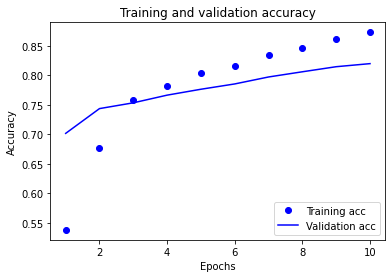

In [70]:
history_dict = history_NNBest_20.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### 2. 40%

In [71]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.68, 
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 8000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [72]:
NNBest.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_NNBest_40 = NNBest.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
250/250 [==============================] - 2s 8ms/step - loss: 0.6528 - binary_accuracy: 0.6229 - val_loss: 0.6316 - val_binary_accuracy: 0.6662
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6059 - binary_accuracy: 0.6966 - val_loss: 0.5926 - val_binary_accuracy: 0.7122
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5609 - binary_accuracy: 0.7423 - val_loss: 0.5553 - val_binary_accuracy: 0.7432
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5179 - binary_accuracy: 0.7788 - val_loss: 0.5212 - val_binary_accuracy: 0.7656
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4776 - binary_accuracy: 0.8046 - val_loss: 0.4909 - val_binary_accuracy: 0.7862
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4417 - binary_accuracy: 0.8254 - val_loss: 0.4648 - val_binary_accuracy: 0.7988
Epoch 7/10
250/250 [==============================] - 1s 4ms/ste

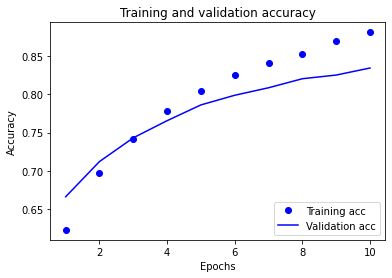

In [73]:
history_dict = history_NNBest_40.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### 3. 60%

In [74]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.52, 
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 12000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [75]:
NNBest.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_NNBest_60 = NNBest.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6440 - binary_accuracy: 0.6482 - val_loss: 0.6036 - val_binary_accuracy: 0.6816
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5671 - binary_accuracy: 0.7126 - val_loss: 0.5496 - val_binary_accuracy: 0.7242
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5127 - binary_accuracy: 0.7583 - val_loss: 0.5084 - val_binary_accuracy: 0.7570
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4658 - binary_accuracy: 0.7894 - val_loss: 0.4752 - val_binary_accuracy: 0.7834
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4283 - binary_accuracy: 0.8135 - val_loss: 0.4475 - val_binary_accuracy: 0.7978
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3949 - binary_accuracy: 0.8335 - val_loss: 0.4253 - val_binary_accuracy: 0.8068
Epoch 7/10
375/375 [==============================] - 1s 4ms/ste

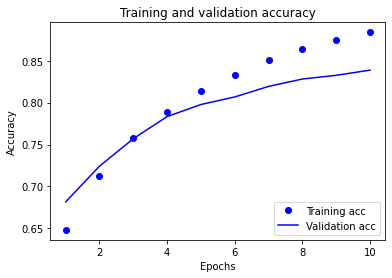

In [76]:
history_dict = history_NNBest_60.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### 4. 80%

In [77]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.36, 
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 16000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [78]:
NNBest.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_NNBest_80 = NNBest.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 0.7316 - binary_accuracy: 0.6179 - val_loss: 0.6531 - val_binary_accuracy: 0.6682
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5949 - binary_accuracy: 0.7009 - val_loss: 0.5655 - val_binary_accuracy: 0.7214
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5143 - binary_accuracy: 0.7527 - val_loss: 0.5093 - val_binary_accuracy: 0.7524
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4571 - binary_accuracy: 0.7911 - val_loss: 0.4684 - val_binary_accuracy: 0.7822
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4140 - binary_accuracy: 0.8194 - val_loss: 0.4373 - val_binary_accuracy: 0.7988
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3789 - binary_accuracy: 0.8411 - val_loss: 0.4120 - val_binary_accuracy: 0.8156
Epoch 7/10
500/500 [==============================] - 2s 4ms/ste

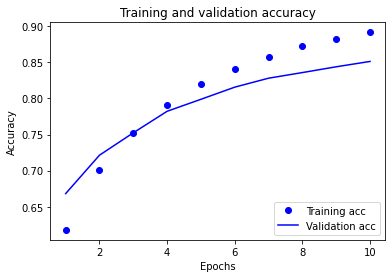

In [79]:
history_dict = history_NNBest_80.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

#### 5. 100%

In [80]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training',
    seed=seed)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)


raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [81]:
NNBest.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

epochs = 10
history_NNBest_100 = NNBest.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6400 - binary_accuracy: 0.6806 - val_loss: 0.5868 - val_binary_accuracy: 0.7124
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5281 - binary_accuracy: 0.7456 - val_loss: 0.5135 - val_binary_accuracy: 0.7536
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4609 - binary_accuracy: 0.7886 - val_loss: 0.4671 - val_binary_accuracy: 0.7796
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4136 - binary_accuracy: 0.8196 - val_loss: 0.4338 - val_binary_accuracy: 0.7984
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3800 - binary_accuracy: 0.8403 - val_loss: 0.4086 - val_binary_accuracy: 0.8124
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3501 - binary_accuracy: 0.8561 - val_loss: 0.3890 - val_binary_accuracy: 0.8268
Epoch 7/10
625/625 [==============================] - 2s 3ms/ste

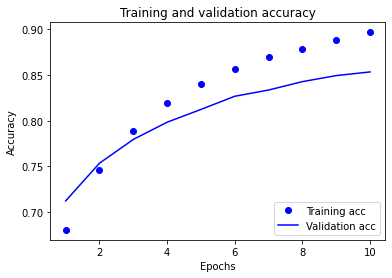

In [82]:
history_dict = history_NNBest_100.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

* Accuracy of model when training with 100% data is highest.

# Task 5

#### BERT model

In [83]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.9.0"

     |████████████████████████████████| 4.6 MB 4.7 MB/s 


In [84]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 73.5 MB/s 
     |████████████████████████████████| 238 kB 88.1 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 118 kB 65.2 MB/s 
     |████████████████████████████████| 352 kB 66.4 MB/s 
     |████████████████████████████████| 99 kB 11.2 MB/s 
     |████████████████████████████████| 1.1 MB 60.0 MB/s 


In [85]:
import numpy as np

In [86]:
import tensorflow_hub as hub
import tensorflow_text as text

In [87]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds_bert = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [88]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 


tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [89]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [90]:
def build_classifier_model(dropout_value):
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(dropout_value)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [91]:
BERTi = build_classifier_model(dropout_value=0.1)
BERTii = build_classifier_model(dropout_value=0.2)
BERTiii = build_classifier_model(dropout_value=0.6)

In [92]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [93]:
from official.nlp import optimization

epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [94]:
BERTi.compile(optimizer=optimizer, loss=loss, metrics=metrics)
BERTii.compile(optimizer=optimizer, loss=loss, metrics=metrics)
BERTiii.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [95]:
history_BERTi = BERTi.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 66s 95ms/step - loss: 0.5060 - binary_accuracy: 0.7225 - val_loss: 0.3876 - val_binary_accuracy: 0.8144
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3488 - binary_accuracy: 0.8425 - val_loss: 0.4126 - val_binary_accuracy: 0.8184
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2575 - binary_accuracy: 0.8936 - val_loss: 0.4352 - val_binary_accuracy: 0.8354
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1915 - binary_accuracy: 0.9258 - val_loss: 0.4835 - val_binary_accuracy: 0.8466
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1409 - binary_accuracy: 0.9506 - val_loss: 0.6137 - val_binary_accuracy: 0.8440
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1054 - binary_accuracy: 0.9646 - val_loss: 0.6638 - val_binary_accuracy: 0.8496
Epoch 7/10
625/625 [==============================] 

In [96]:
history_BERTii = BERTii.fit(x=train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 64s 93ms/step - loss: 0.7489 - binary_accuracy: 0.5751 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7533 - binary_accuracy: 0.5035 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7535 - binary_accuracy: 0.5056 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7490 - binary_accuracy: 0.5082 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7495 - binary_accuracy: 0.5093 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7519 - binary_accuracy: 0.5023 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 7/10
625/625 [==============================] 

In [97]:
history_BERTiii = BERTii.fit(x=train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7479 - binary_accuracy: 0.5104 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7515 - binary_accuracy: 0.5056 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7482 - binary_accuracy: 0.5066 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7545 - binary_accuracy: 0.5017 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7542 - binary_accuracy: 0.4974 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.7549 - binary_accuracy: 0.4965 - val_loss: 0.7120 - val_binary_accuracy: 0.5080
Epoch 7/10
625/625 [==============================] 

In [98]:
loss, accuracy = BERTi.evaluate(test_ds_bert)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 47s 61ms/step - loss: 0.8703 - binary_accuracy: 0.8546
Loss: 0.8702930212020874
Accuracy: 0.8545600175857544


In [99]:
loss, accuracy = BERTii.evaluate(test_ds_bert)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 45s 58ms/step - loss: 0.7167 - binary_accuracy: 0.5099
Loss: 0.7167344689369202
Accuracy: 0.509880006313324


In [100]:
loss, accuracy = BERTiii.evaluate(test_ds_bert)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 46s 58ms/step - loss: 0.7093 - binary_accuracy: 0.5055
Loss: 0.7093488574028015
Accuracy: 0.5055000185966492


* Model Berti's accuracy is about 0.85 but both Bertii and Bertiii accuracy are 0.77. So that Berti is best model.
* NNBest accuracy start from 0.77 to 0.85 but Berti model has 0.85 as the first epoch, so that Berti model better than NNBest model

# Task 6

#### Change your NNBest model to apply dropout at test time

In [101]:
test_ds_bert = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [102]:
data_test_bert = [[example.numpy(), label.numpy()] for example, label in test_ds_bert]

In [103]:
data_test_data = np.concatenate(np.array(data_test_bert)[:, 0])
data_test_label = np.concatenate(np.array(data_test_bert)[:, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [105]:
pos_data_test = []
neg_data_test = []
for data, label in zip(data_test_data, data_test_label):
  if label==0:
    pos_data_test.append(data)
  else:
    neg_data_test.append(data)

In [106]:
export_NNBest = tf.keras.Sequential([
  vectorize_layer,
  NNBest,
  layers.Activation('sigmoid')
])

export_NNBest.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

In [107]:
y_probas = np.stack([export_NNBest.predict(pos_data_test[:5], verbose=0) for sample in range(10)])
y_proba_pos_NNBestDrop = y_probas.mean(axis=0)

y_probas = np.stack([export_NNBest.predict(neg_data_test[:5], verbose=0) for sample in range(10)])
y_proba_neg_NNBestDrop = y_probas.mean(axis=0)

In [108]:
y_probas_pos_NNBest = export_NNBest.predict(pos_data_test[:5], verbose=0)
y_probas_neg_NNBest = export_NNBest.predict(neg_data_test[:5], verbose=0)

#### Comparison

In [109]:
y_probas_pos_NNBest

array([[5.3819269e-01],
       [9.7358748e-03],
       [1.1174929e-03],
       [4.4951950e-05],
       [4.7954302e-02]], dtype=float32)

In [110]:
y_proba_pos_NNBestDrop

array([[5.3819269e-01],
       [9.7358748e-03],
       [1.1174929e-03],
       [4.4951947e-05],
       [4.7954299e-02]], dtype=float32)

*Don*'t have different between NNBestDrop and NNBest on positive prediction

In [111]:
y_probas_neg_NNBest

array([[0.9952009 ],
       [0.93458116],
       [0.8718079 ],
       [0.9805588 ],
       [0.27151003]], dtype=float32)

In [112]:
y_proba_neg_NNBestDrop

array([[0.995201  ],
       [0.93458116],
       [0.87180793],
       [0.98055875],
       [0.27151006]], dtype=float32)

#### models predict wrong neg[0] and neg[1], so we will check these texts

In [113]:
neg_data_test[0]

b"My family truly enjoyed this movie. As far as what this movie will do for Rugby in the USA...well I am sure that will be debatable. But as for me and others around me, I know that we were more curious about the sport after seeing the movie and I personally gained more respect for the game. You may wonder how this possible, especially since the movie does not dive in and explain Rugby. But the simple fact is it drew you into the players and emotion of the game and life. The film was inspirational as well as entertaining. It made us laugh and cry. The chemistry between Sean Astin, Big Budah and Sean Faris worked well. Some may think the movie is a little clich\xc3\xa9, but I seriously wish Hollywood made more movies like this. I couldn't help drawing analogies of the game and life's struggles. At the end of it I found myself examining my own life to see what I needed to do better, in order to be the best person I could be. Honestly I was grateful this movie taught morals, values and te

In [114]:
neg_data_test[3]

b"I really liked this movie. If other people want to give it an average around 5.0/10 that's their choice. I would give it 10/10. Sutherland's performance as a private eye is totally awesome. The story is amazing, human, exciting, intelligent. The dialogue is good. The story might not be perfect but anyway - the mood of the movie is good enough to compensate for that. Moreover, the ending is incredibly cool and their the jig-saw puzzle really comes back to together. So anyway I liked it. I also thought the female lead actress performed very well. I'm not a big fan of detective movies but this one was really good, also because it doesn't give a damn about conventions of the supernatural."

# Task 7

Find the 20 most positive and 20 most negative reviews from the test set under the best model NNBest

In [115]:
y_probas_pos_NNBest = export_NNBest.predict(pos_data_test, verbose=0)
y_probas_neg_NNBest = export_NNBest.predict(neg_data_test, verbose=0)

In [116]:
y_probas_pos_NNBest_correctly, most_pos_data_test_correctly = zip(*sorted(zip(y_probas_pos_NNBest, pos_data_test))[:20])
y_probas_neg_NNBest_correctly, most_neg_data_test_correctly = zip(*sorted(zip(y_probas_neg_NNBest, neg_data_test), reverse=True)[:20])

In [117]:
y_probas = np.stack([export_NNBest.predict(most_pos_data_test_correctly, verbose=0) for sample in range(10)])
y_proba_pos_NNBestDrop_correctly = y_probas.mean(axis=0)

y_probas = np.stack([export_NNBest.predict(most_neg_data_test_correctly, verbose=0) for sample in range(10)])
y_proba_neg_NNBestDrop_correctly = y_probas.mean(axis=0)

In [118]:
y_probas_pos_NNBest_correctly

(array([2.8360216e-07], dtype=float32),
 array([3.0012404e-07], dtype=float32),
 array([8.116192e-07], dtype=float32),
 array([8.2804377e-07], dtype=float32),
 array([1.1238752e-06], dtype=float32),
 array([1.9456068e-06], dtype=float32),
 array([2.7330643e-06], dtype=float32),
 array([2.8251534e-06], dtype=float32),
 array([3.8191342e-06], dtype=float32),
 array([4.3541963e-06], dtype=float32),
 array([4.3626465e-06], dtype=float32),
 array([4.537027e-06], dtype=float32),
 array([4.537027e-06], dtype=float32),
 array([4.724149e-06], dtype=float32),
 array([5.0333633e-06], dtype=float32),
 array([5.236405e-06], dtype=float32),
 array([5.4132393e-06], dtype=float32),
 array([6.113862e-06], dtype=float32),
 array([6.4340043e-06], dtype=float32),
 array([6.8440363e-06], dtype=float32))

Don't have different between NNBestDrop and NNBest on top 20 most positive prediction

In [119]:
y_proba_pos_NNBestDrop_correctly

array([[2.8360219e-07],
       [3.0012407e-07],
       [8.1161932e-07],
       [8.2804388e-07],
       [1.1238752e-06],
       [1.9456070e-06],
       [2.7330643e-06],
       [2.8251532e-06],
       [3.8191347e-06],
       [4.3541959e-06],
       [4.3626465e-06],
       [4.5370266e-06],
       [4.5370266e-06],
       [4.7241488e-06],
       [5.0333629e-06],
       [5.2364048e-06],
       [5.4132393e-06],
       [6.1138626e-06],
       [6.4340047e-06],
       [6.8440359e-06]], dtype=float32)

In [120]:
y_proba_pos_NNBestDrop_correctly

array([[2.8360219e-07],
       [3.0012407e-07],
       [8.1161932e-07],
       [8.2804388e-07],
       [1.1238752e-06],
       [1.9456070e-06],
       [2.7330643e-06],
       [2.8251532e-06],
       [3.8191347e-06],
       [4.3541959e-06],
       [4.3626465e-06],
       [4.5370266e-06],
       [4.5370266e-06],
       [4.7241488e-06],
       [5.0333629e-06],
       [5.2364048e-06],
       [5.4132393e-06],
       [6.1138626e-06],
       [6.4340047e-06],
       [6.8440359e-06]], dtype=float32)

In [121]:
y_proba_neg_NNBestDrop_correctly

array([[0.9999999 ],
       [0.99999845],
       [0.9999975 ],
       [0.9999887 ],
       [0.99998844],
       [0.99997914],
       [0.99997675],
       [0.99997485],
       [0.9999676 ],
       [0.9999572 ],
       [0.9999417 ],
       [0.9999405 ],
       [0.9999355 ],
       [0.9999281 ],
       [0.9999279 ],
       [0.99992526],
       [0.9999161 ],
       [0.9999145 ],
       [0.9999119 ],
       [0.99989617]], dtype=float32)

* As we can see model NNBestDrop accurate than NNBest model.

#### Repeat the above, but for the 20 most positive and 20 most negative reviews under the best model NNBest that are incorrectly classified.


In [122]:
y_probas_pos_NNBest_incorrectly, most_pos_data_test_incorrectly = zip(*sorted(zip(y_probas_pos_NNBest, pos_data_test), reverse=True)[:20])
y_probas_neg_NNBest_incorrectly, most_neg_data_test_incorrectly = zip(*sorted(zip(y_probas_neg_NNBest, neg_data_test))[:20])

In [123]:
y_probas = np.stack([export_NNBest.predict(most_pos_data_test_incorrectly, verbose=0) for sample in range(10)])
y_proba_pos_NNBestDrop_incorrectly = y_probas.mean(axis=0)

y_probas = np.stack([export_NNBest.predict(most_neg_data_test_incorrectly, verbose=0) for sample in range(10)])
y_proba_neg_NNBestDrop_incorrectly = y_probas.mean(axis=0)

In [ ]:
most_pos_data_test_incorrectly[0]

In [125]:
most_neg_data_test_incorrectly[0]

b'My buddies and I spent the majority of a Saturday afternoon watching a selection of "bad" movies. Among the flicks we watched, the strongest contender (for quality bad-movie fare) was easily Jack-O. It\'s ludicrous that movies such as "Gigli", "Glitter" and "You Got Served" are listed in IMDBs bottom 100. While they\'re certainly bad movies, they don\'t belong in the bottom 100. They\'re robbing "Jack-O", and "Keeper of Time", etc, of the Bad Movie Greatness they so richly deserve.<br /><br />So what makes Jack-O so great (in bad movie terms)? For starters, Steve Latshaw, the director, decided to cast his son, Ryan Latshaw, in the role of Sean Kelly. Unfortunately for Steve, Ryan Latshaw was dangerously close to being out-acted by a block of wood. The kid, seriously, has no ability to emote whatsoever. The end result: unintentional comic gold. The kid could be listening to a joke, or just moments away from getting his head smashed asunder, and his expression is one of stony "emotionl

In [126]:
y_probas_pos_NNBest_incorrectly

(array([0.99980015], dtype=float32),
 array([0.99915445], dtype=float32),
 array([0.9989942], dtype=float32),
 array([0.9986444], dtype=float32),
 array([0.998204], dtype=float32),
 array([0.9980263], dtype=float32),
 array([0.99762887], dtype=float32),
 array([0.9971873], dtype=float32),
 array([0.9964637], dtype=float32),
 array([0.99644595], dtype=float32),
 array([0.9962094], dtype=float32),
 array([0.99589807], dtype=float32),
 array([0.9957795], dtype=float32),
 array([0.99467343], dtype=float32),
 array([0.9946601], dtype=float32),
 array([0.99456316], dtype=float32),
 array([0.9939586], dtype=float32),
 array([0.9939341], dtype=float32),
 array([0.9937542], dtype=float32),
 array([0.9937342], dtype=float32))

In [127]:
y_probas_neg_NNBest_incorrectly

(array([0.00020605], dtype=float32),
 array([0.00032619], dtype=float32),
 array([0.00032619], dtype=float32),
 array([0.00075081], dtype=float32),
 array([0.00076167], dtype=float32),
 array([0.00077957], dtype=float32),
 array([0.00203165], dtype=float32),
 array([0.00218548], dtype=float32),
 array([0.00242549], dtype=float32),
 array([0.00255104], dtype=float32),
 array([0.00256156], dtype=float32),
 array([0.00266402], dtype=float32),
 array([0.00266848], dtype=float32),
 array([0.00324451], dtype=float32),
 array([0.00368431], dtype=float32),
 array([0.00386061], dtype=float32),
 array([0.00387647], dtype=float32),
 array([0.00398598], dtype=float32),
 array([0.00422106], dtype=float32),
 array([0.0048343], dtype=float32))

In [128]:
y_probas_neg_NNBest_incorrectly

(array([0.00020605], dtype=float32),
 array([0.00032619], dtype=float32),
 array([0.00032619], dtype=float32),
 array([0.00075081], dtype=float32),
 array([0.00076167], dtype=float32),
 array([0.00077957], dtype=float32),
 array([0.00203165], dtype=float32),
 array([0.00218548], dtype=float32),
 array([0.00242549], dtype=float32),
 array([0.00255104], dtype=float32),
 array([0.00256156], dtype=float32),
 array([0.00266402], dtype=float32),
 array([0.00266848], dtype=float32),
 array([0.00324451], dtype=float32),
 array([0.00368431], dtype=float32),
 array([0.00386061], dtype=float32),
 array([0.00387647], dtype=float32),
 array([0.00398598], dtype=float32),
 array([0.00422106], dtype=float32),
 array([0.0048343], dtype=float32))

In [129]:
y_proba_neg_NNBestDrop_incorrectly

array([[0.00020605],
       [0.00032619],
       [0.00032619],
       [0.00075081],
       [0.00076167],
       [0.00077957],
       [0.00203165],
       [0.00218548],
       [0.00242549],
       [0.00255104],
       [0.00256156],
       [0.00266403],
       [0.00266848],
       [0.00324451],
       [0.00368431],
       [0.00386061],
       [0.00387647],
       [0.00398598],
       [0.00422106],
       [0.0048343 ]], dtype=float32)

* Both models don't have much different between wrong prediction on positive and negative